<a href="https://colab.research.google.com/github/timkim0713/datasci-nyc-airbnb/blob/master/cse351_hw1_kim_daekyung_110887867.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Data Setup

# UPLOADED the output of above to below url
data = 'https://raw.githubusercontent.com/timkim0713/datasci-nyc-airbnb/master/AB_NYC_2019.csv'
df = pd.read_csv(data)


# **TASK 1. Cleaning Data**


### **Handling Strange Values** <br/>

```
df['price'] == 0).sum()
df['availability_365'] == 0).sum()
```

- There are 11 rows of prices at 0. Therefore, these 11 rows of 0 prices are dropped.

- There are 17533 rows of availability_365 as 0. However, this was also purposely not handled as some hosts may have set this as 0 to take no more guests. 

### **Handling NaN Values** <br/>

```
df.isnull().sum()
```
The code above have shown the data with all NaN values. Therefore, I made the modification as below. 

- 16 NaN 'name' to "unknown" <br/>
- 21 NaN 'host_name' to 'unknown' <br/>
- Replaced NaN reviews_per_month to 0 <br/>
- Last_review is a column that is not critical to our data, yet it has NaN values. Therefore, I have removed this column in the entire dataset.It is okay, because we still have the more valuable data: number of reviews.<br/>

In [ ]:
# TASK 1. Cleaning Data

# handle NaN values of name, host_name, reviews_per_month
df = df.fillna({'name': 'unknown', 'host_name': 'unknown', 'reviews_per_month': 0})

# drop last_review column
df = df.drop('last_review', 1)

# remove price at 0 
df = df.loc[df['price'] != 0]

# Removed all anomalies
df.isnull().sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **TASK 2. Price Changes in the Neighbourhood**


## **2a. Top 5 and Bottom 5 Avg. Prices of Neighbours (Above 5 Listings)**
We see that there are several neighbours which occur little (less than 5). They are filtered and removed to find the top and bottom 5 average prices based on neighbourhoods.

## **2b. Prices Across Different Neighbourhood Groups**
We see that Manhattan has a wide range of prices, more expensive than the other groups. Then, Brooklyn is the next highest in average.
Queens, Staten Island, and Bronx are similary have low prices overall.


In [ ]:
# Task 2a. Top 5, Bottom 5 Prices of Neighbours (Above 5 Listings)
frequency = df['neighbourhood'].value_counts()

# Filter Listings below <=5
df_filtered_below_5 = frequency[frequency <= 5]  
removed_neighbours = df_filtered_below_5.keys()

# Remove the neighbours that occur below 5
df_copy = df 
df_copy = df_copy[df_copy.neighbourhood.isin(list(removed_neighbours))]

# Find the mean price of the filtered neigbours/price
avg = df_copy.groupby('neighbourhood')['price'].mean()

print("Top 5 Avg. Prices of Neighbourhoods (Excluding neighbourhood counts <=5)")
print(avg.sort_values(ascending=False).head(5))

print("Bottom 5 Avg. Prices of Neighbourhoods (Excluding neighbourhood counts <=5)")
print(avg.sort_values(ascending=True).head(5))



Top 5 Avg. Prices of Neighbourhoods (Excluding neighbourhood counts <=5)
neighbourhood
Fort Wadsworth    800.000000
Woodrow           700.000000
Prince's Bay      409.500000
Neponsit          274.666667
Willowbrook       249.000000
Name: price, dtype: float64
Bottom 5 Avg. Prices of Neighbourhoods (Excluding neighbourhood counts <=5)
neighbourhood
New Dorp          57.00
New Dorp Beach    57.40
Olinville         64.00
Arden Heights     67.25
Emerson Hill      68.20
Name: price, dtype: float64


Average Price By Neighbourhood Group
neighbourhood_group
Bronx             87.577064
Brooklyn         124.438915
Manhattan        196.884903
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


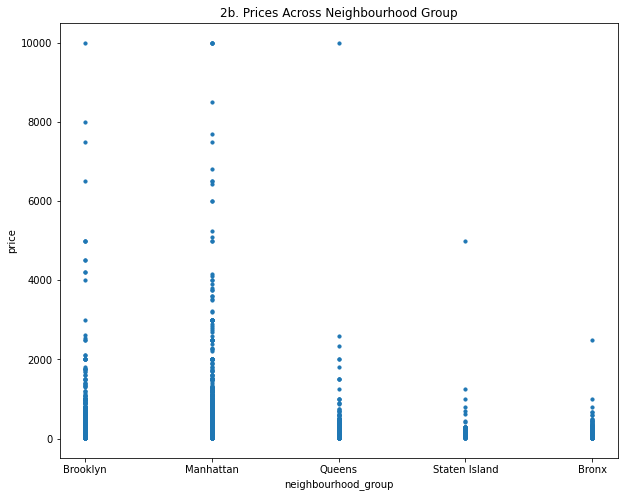

In [ ]:
# Task 2b.

# 7.2 df setup with neighbourhood_group, room_type, and availability_365
df_2_b = df[['neighbourhood_group','price']]

price_colors = {}
price_counter = 1
for i in df['price']:
  if i not in price_colors:
    price_colors[i] = price_counter
    price_counter += 1



fig, ((ax1)) = plt.subplots(1,1, figsize=(10,8))

df_2_b.plot.scatter(ax=ax1, x = 'neighbourhood_group', y = 'price', title="2b. Prices Across Neighbourhood Group" ,s=10);
df_2_b_avg = df.groupby('neighbourhood_group')['price'].mean()
print("Average Price By Neighbourhood Group")
print(df_2_b_avg)


# **TASK 3. Pairwise Correlation Heat Map**


### **Interseting Featuers** <br/>

Created a correlation heatmap for values that have more meanings. (Removed names, ids, room_type, latitude, longitude - which give no meanings in correlation).

- Price <br/>
- Minimum Nights <br/>
- Number of Reviews <br/>
- Reviews Per Month<br/>
- Calculated Host Listings Count<br/>
- Availability 365<br/>


The most positive correlation excluding one to itself is
- reviews_per_month to number_of_reviews
Which is expected because the most reviews you have, the more likely you will have reviews per month

The most negative correlation is
- number_of_reviews to minimum_nights
This shows that having a higher value of minimum_nights often lead to a lower reviews.

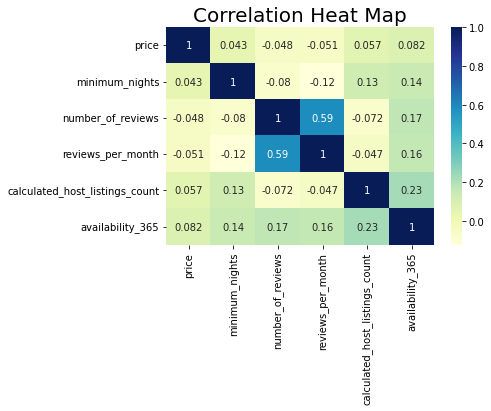

In [ ]:
# TASK 3. Correlation Heat Map

corr_df = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']]
dataplot = sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heat Map',fontsize = 20)

plt.show()



# **TASK 4a. Scatter Plot on Coordinates & Neighbourhood Group**


### **Scatter Plot** <br/>

Created a scatter plot basd on the longitude/latitude and neighbourhood group.


Colors are mapped accordingly as below
{'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4, 'Bronx': 5}


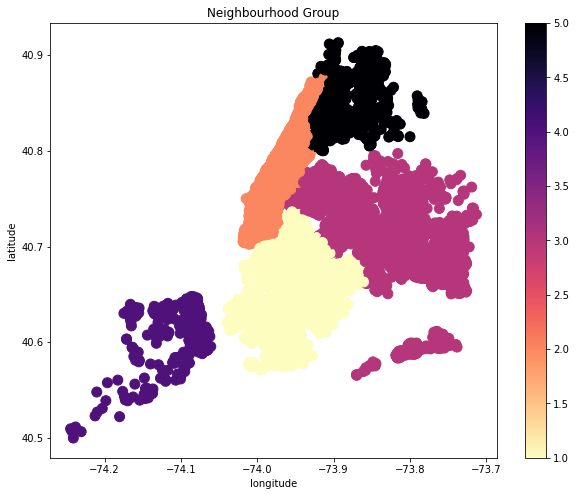

In [ ]:
# TASK 4a. Scatter Plot on Coordinates & Neighbourhood Group
df_coordinates = df[['longitude', 'latitude']]

colors = {}
counter = 1
for i in df['neighbourhood_group']:
  if i not in colors:
    colors[i] = counter
    counter += 1

fig, ((ax1)) = plt.subplots(1,1, figsize=(10,8))

df_coordinates.plot.scatter(ax=ax1, x = 'longitude', y = 'latitude', title="Neighbourhood Group",xlabel="longitude", ylabel="latitude", s=100, c=df['neighbourhood_group'].map(colors), cmap = "magma_r");

print("Colors are mapped accordingly as below")
print(colors)

# **TASK 4b. Scatter Plot on Coordinates & Price**


### **Scatter Plot** <br/>

Created a scatter plot basd on the longitude/latitude and Price (below 1000).
Although it is not perfectly clear, we can see that by comparing with the 4a. scatter plot with 4b, Manhattan is the most expensive neighbourhood group.


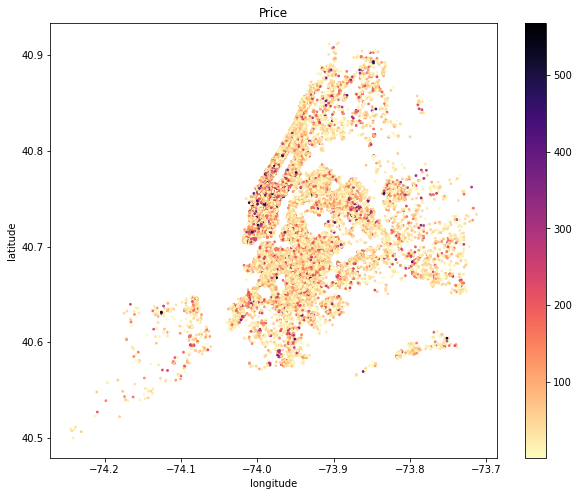

In [ ]:
# TASK 4b. Scatter Plot on Coordinates & Price

df_coordinates = df[['longitude', 'latitude']]

colors = {}
counter = 1
for i in df['price']:
  if i not in colors and i <1000:
    colors[i] = counter
    counter += 1
fig, ((ax1)) = plt.subplots(1,1, figsize=(10,8))

df_coordinates.plot.scatter(ax=ax1, x = 'longitude', y = 'latitude', title="Price" ,s=3, c=df['price'].map(colors), cmap = "magma_r");




# **TASK 5. Word Cloud**


### **Word Cloud** <br/>

Extracted Words from the dataframe to create word cloud; then, used plt to display the word cloud. Used WordCloud Package.

- Price <br/>
- Minimum Nights <br/>
- Number of Reviews <br/>
- Reviews Per Month<br/>
- Calculated Host Listings Count<br/>
- Availability 365<br/>

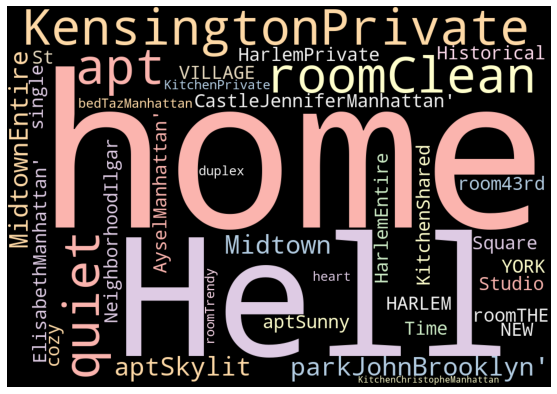

In [ ]:
# TASK 5. Word Cloud 

words = df['neighbourhood'].values  + df['room_type'].values +  df['name'].values  +df['host_name'].values  + df['neighbourhood_group'].values
wordcloud = WordCloud(width= 1000, height = 700, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(str(words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud) 
plt.axis("off");

# **TASK 6. Busiest Host**


### **Scatter Plots** <br/>

Used Scatter Plot to identify Busiest Hosts by comparing prices, number_of_reviews, Availability, etc.

The plots below show that Manhattan and Queens are most busier than the other groups. We can support this arugment because Queens are has more reviews and reviews per month in average than the other groups. Manhattan area has the higher price than the other groups.

Thus, we can state that price and reviews are the prime factors in determining the busiest host areas. 

{'Brooklyn': 1, 'Manhattan': 2, 'Queens': 3, 'Staten Island': 4, 'Bronx': 5}


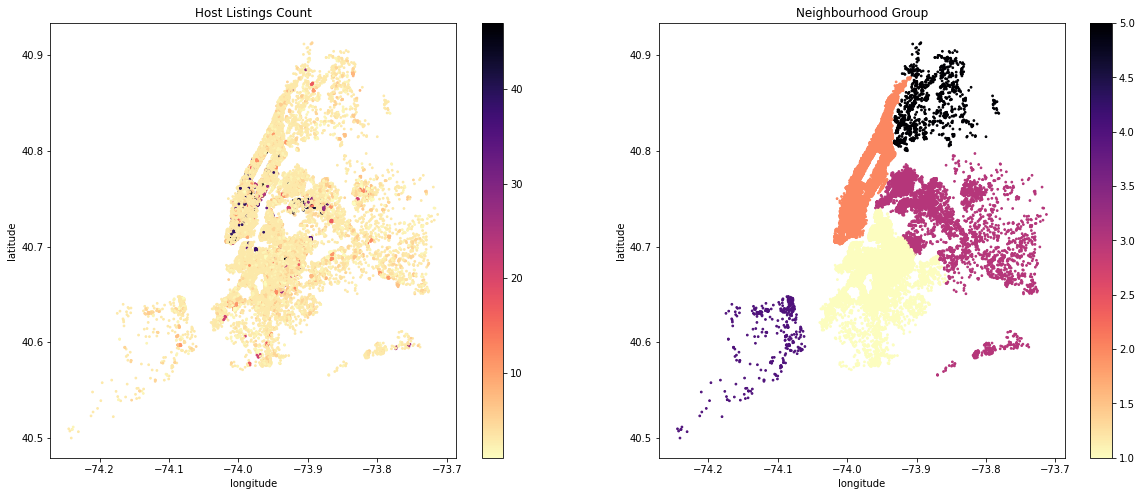

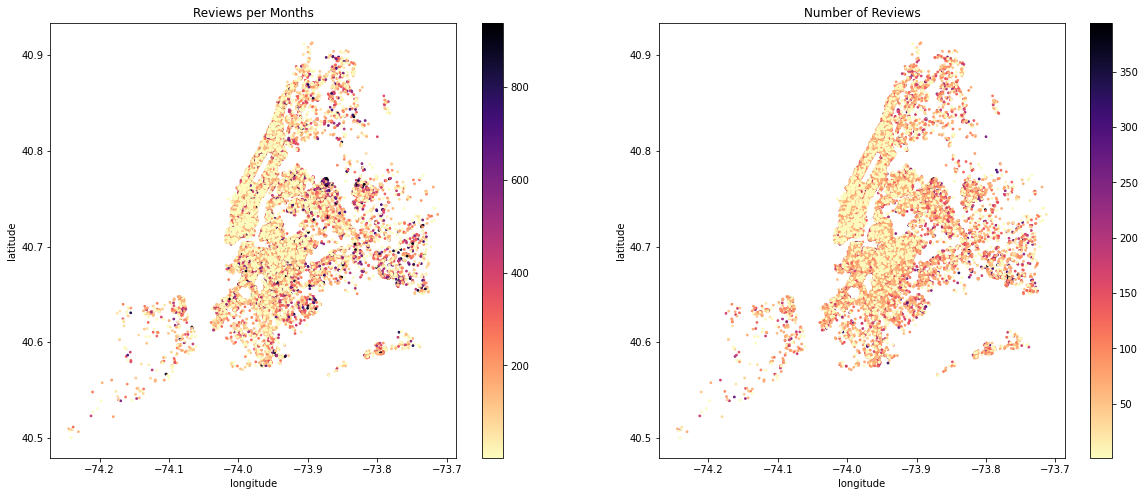

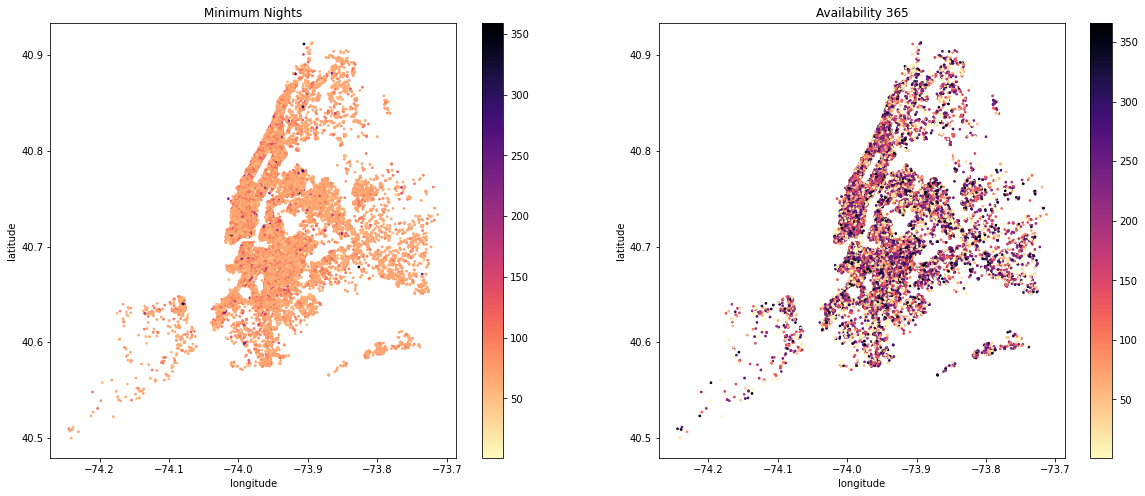

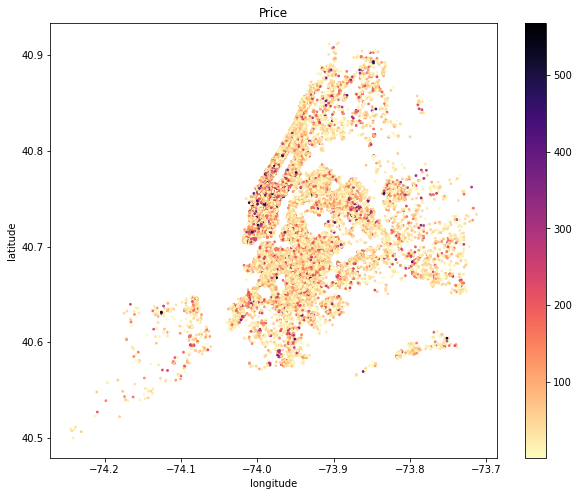

In [ ]:
# TASK 6. Busiest Host


# availability, price, review

df_coordinates = df[['longitude', 'latitude']]

listings_colors = {}
listings_counter = 1
for i in df['calculated_host_listings_count']:
  if i not in listings_colors:
    listings_colors[i] = listings_counter
    listings_counter += 1

neighbour_colors = {}
neighbour_counter = 1
for i in df['neighbourhood_group']:
  if i not in neighbour_colors:
    neighbour_colors[i] = neighbour_counter
    neighbour_counter += 1

availability_colors = {}
availability_counter = 1
for i in df['availability_365']:
  if i not in availability_colors:
    availability_colors[i] = availability_counter
    availability_counter += 1

review_colors = {}
review_counter = 1
for i in df['number_of_reviews']:
  if i not in review_colors:
    review_colors[i] = review_counter
    review_counter += 1


review_monthly_colors = {}
review_monthly_counter = 1
for i in df['reviews_per_month']:
  if i not in review_monthly_colors:
    review_monthly_colors[i] = review_monthly_counter
    review_monthly_counter += 1



minimum_nights_colors = {}
minimum_nights_counter = 1
for i in df['number_of_reviews']:
  if i not in minimum_nights_colors:
    minimum_nights_colors[i] = minimum_nights_counter
    minimum_nights_counter += 1

price_colors = {}
price_counter = 1
for i in df['price']:
  if i not in price_colors and i <1000:
    price_colors[i] = price_counter
    price_counter += 1
print(neighbour_colors)


fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,8))

df_coordinates.plot.scatter(ax=ax1, x = 'longitude', y = 'latitude', title="Host Listings Count", xlabel="longitude", ylabel="latitude", s=3, c=df['calculated_host_listings_count'].map(listings_colors), cmap = "magma_r");
df_coordinates.plot.scatter(ax=ax2, x = 'longitude', y = 'latitude', title="Neighbourhood Group", xlabel="longitude", ylabel="latitude", s=3, c=df['neighbourhood_group'].map(neighbour_colors), cmap = "magma_r", );

fig2, ((ax3, ax4)) = plt.subplots(1,2, figsize=(20,8))
df_coordinates.plot.scatter(ax=ax3, x = 'longitude', y = 'latitude', title="Reviews per Months", xlabel="longitude", ylabel="latitude", s=3, c=df['reviews_per_month'].map(review_monthly_colors), cmap = "magma_r");
df_coordinates.plot.scatter(ax=ax4, x = 'longitude', y = 'latitude', title="Number of Reviews", xlabel="longitude", ylabel="latitude", s=3, c=df['number_of_reviews'].map(review_colors), cmap = "magma_r");

fig3, ((ax5, ax6)) = plt.subplots(1,2, figsize=(20,8))
df_coordinates.plot.scatter(ax=ax5, x = 'longitude', y = 'latitude', title="Minimum Nights", xlabel="longitude", ylabel="latitude", s=3, c=df['minimum_nights'].map(minimum_nights_colors), cmap = "magma_r");
df_coordinates.plot.scatter(ax=ax6, x = 'longitude', y = 'latitude', title="Availability 365", xlabel="longitude", ylabel="latitude", s=3, c=df['availability_365'].map(availability_colors), cmap = "magma_r");



fig4, ((ax7)) = plt.subplots(1,1, figsize=(10,8))
df_coordinates.plot.scatter(ax=ax7, x = 'longitude', y = 'latitude', title="Price" ,s=3, c=df['price'].map(price_colors), cmap = "magma_r");




# **TASK 7. Interesting Reveal**


### **Scatter Plots on Interesting Reveal** <br/>

Used Different Plots to find that 

Through **7.1** Graph, there is not a significant correlation between price and the number of reviews.

Through **7.2** Graph, we see that 365 availability has a positive correlation with the price. For instance, in Manhattan, we see higher prices at highere 365 availability; which is also the case in the other neighbourhood groups too.

Through **7.3** Graph, there is more demand in Manhattan and Brooklyn area than the other neighbourhood groups. 

Through **7.4** Graph, we can say that Shared Rooms are not popular, whereas entire apartment / private rooms are.

Through **7.5** Graph, we can find a strange pattern where Manhattan is the only place that has significant more amount of Entire Home / Apt than Private Rooms. The other areas are all in favor of Priavte Rooms.
It is a multi-column bar graphs to determine the frequency of room types distribution across the neighbourhood groups


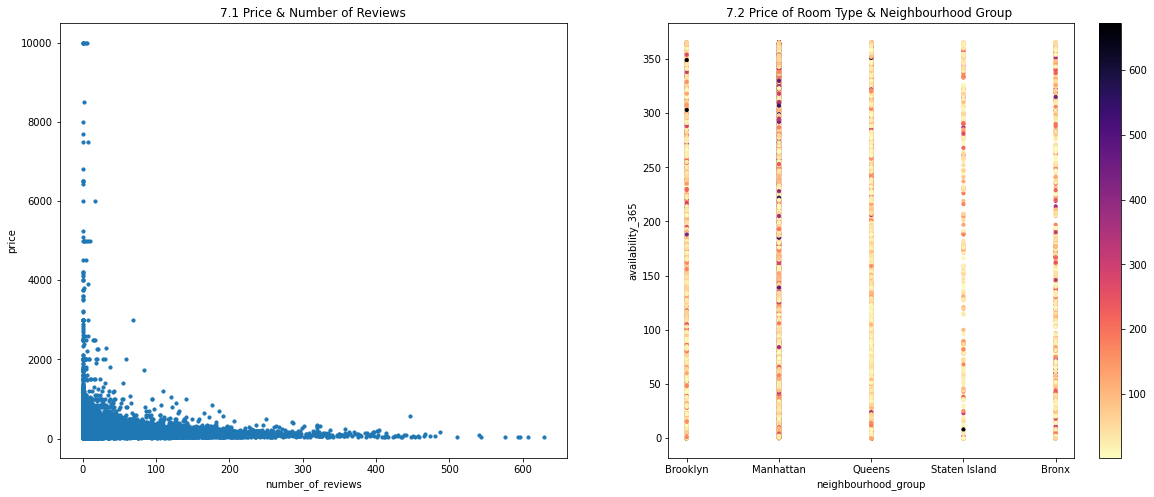

In [ ]:
# TASK 7. Interesting Reveal 

# 7.1 df setup with price and number of reviews
df_7_1 = df[['price','number_of_reviews']]

group_colors = {}
group_counter = 1
for i in df['neighbourhood_group']:
  if i not in group_colors:
    group_colors[i] = group_counter
    group_counter += 1


# 7.2 df setup with neighbourhood_group, room_type, and availability_365
df_7_2 = df[['neighbourhood_group','room_type','availability_365']]

price_colors = {}
price_counter = 1
for i in df['price']:
  if i not in price_colors:
    price_colors[i] = price_counter
    price_counter += 1



fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,8))

df_7_1.plot.scatter(ax=ax1, x = 'number_of_reviews', y = 'price', title="7.1 Price & Number of Reviews" ,s=10);
df_7_2.plot.scatter(ax=ax2, x = 'neighbourhood_group', y = 'availability_365', title="7.2 Price of Room Type & Neighbourhood Group ",s=10, c=df['price'].map(price_colors), cmap = "magma_r");




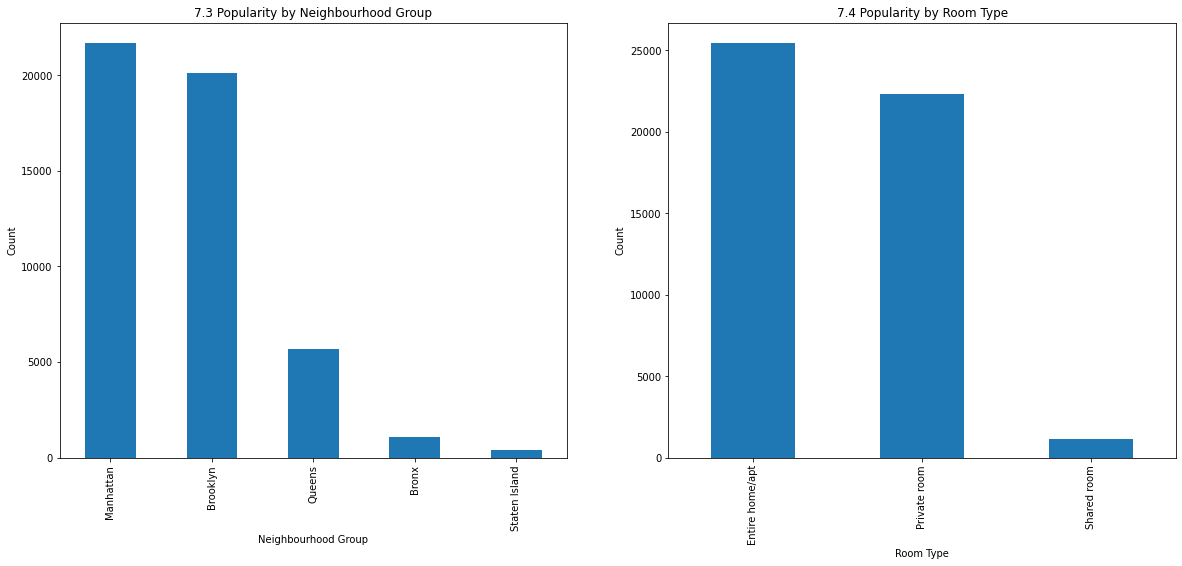

In [ ]:
# 7.3 and 7.4 df setup and simple bar graphs
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(20,8))
df_7_2['neighbourhood_group'].value_counts().plot.bar(ax=ax1, xlabel='Neighbourhood Group',ylabel='Count', title='7.3 Popularity by Neighbourhood Group')
df_7_2['room_type'].value_counts().plot.bar(ax=ax2, xlabel='Room Type',ylabel='Count', title='7.4 Popularity by Room Type')


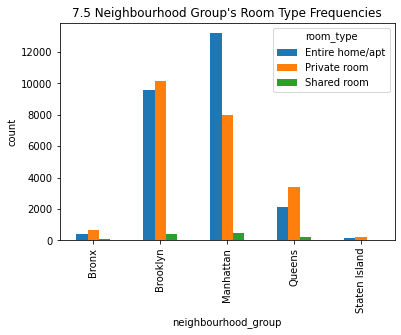

In [ ]:
# 7.5 multi-column bar graphs to determine the frequency of room types distribution across the neighbourhood groups

types_to_count = {'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'}
types_to_count_2 = {'Entire home/apt', 'Private room', 'Shared room',}


pd.crosstab(df['neighbourhood_group'],df['room_type']).plot.bar(title="7.5 Neighbourhood Group's Room Type Frequencies", ylabel='count')
